In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

In [130]:
rodada_jogada = 29               # Ultima rodada jogada: 28
rodada_prox = rodada_jogada+1    # Rodada da proxima semana: 29

rodada_futura = pd.read_excel(f'../old/dados/rodadas/rodada-{rodada_prox}.xlsx')
todas_rodadas = pd.read_excel('../old/dados/rodadas/todas_rodadas.xlsx')
tabela = pd.read_excel(f'../old/dados/tabela/tabela-rodada_{rodada_jogada}.xlsx')
historico = pd.read_excel(f'../old/dados/historico/historico-rodada_{rodada_jogada}.xlsx')
historico.drop(['Time', 'Comp', 'Day', 'Result'], axis= 1, inplace= True)


In [131]:
historico['Venue'] = historico['Venue'].map({'Home': 1, 'Away': 0})

In [132]:
historico['Date'] = pd.to_datetime(historico['Date'], format='%Y-%m-%d')
historico['days'] = (max(historico['Date']) - historico['Date']).dt.days
historico['time_diff'] = np.exp(-0.001*historico['days'])

In [133]:
historico.head()

,Date,Round,Venue,GF,GA,Opponent,xG,xGA,Poss,Attendance,...,GCA,TklW,Def 3rd,Mid 3rd,Att 3rd,Int,Err,Equipe,days,time_diff
0,2023-04-15,1,1,2,1,Sao Paulo,0.9,2.0,33,11708.0,...,3,6,4,4,1,17,0,Botafogo (RJ),193,0.824482
1,2023-04-24,2,0,2,1,Bahia,0.2,0.9,42,27822.0,...,4,11,8,16,0,15,0,Botafogo (RJ),184,0.831936
2,2023-04-30,3,0,3,2,Flamengo,1.9,3.1,26,53138.0,...,6,12,11,6,1,11,0,Botafogo (RJ),178,0.836942
3,2023-05-07,4,1,2,0,Atletico Mineiro,2.0,0.5,39,18218.0,...,3,14,10,12,0,13,1,Botafogo (RJ),171,0.842822
4,2023-05-11,5,1,3,0,Corinthians,2.6,0.6,53,22388.0,...,5,5,4,5,1,11,0,Botafogo (RJ),167,0.846200


In [134]:
historico.columns

Index(['Date', 'Round', 'Venue', 'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss',
       'Attendance', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'FK', 'PK', 'PKatt',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'SoTA', 'Saves', 'Save%', 'CS',
       'PSxG', 'PSxG+/-', 'TotDist', 'PrgDist', 'Ast', 'xAG', 'xA', 'KP',
       '1/3', 'PPA', 'CrsPA', 'PrgP', 'TB', 'Sw', 'Crs', 'Blocks', 'SCA',
       'GCA', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Int', 'Err', 'Equipe',
       'days', 'time_diff'],
      dtype='object')

In [135]:
tabela.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'xGConv', 'xGAConv', 'GF/MP',
       'GA/MP', 'expG', 'xG_casa', 'xG_fora', 'xG_total', 'GF_casa', 'GF_fora',
       'GF_total', 'GA_casa', 'GA_fora', 'GA_total', 'xG_sofrido_casa',
       'xG_sofrido_fora', 'Sh_casa', 'SoT_casa', 'Saves_casa', 'GCA_casa',
       'Tklw_casa', 'Sh_fora', 'SoT_fora', 'Saves_fora', 'GCA_fora',
       'Tklw_fora', 'xG_5casa', 'xG_5fora', 'xG_5total', 'GF_5casa',
       'GF_5fora', 'GF_5total', 'GA_5casa', 'GA_5fora', 'GA_5total',
       'xG_5sofrido_casa', 'xG_5sofrido_fora'],
      dtype='object')

In [136]:
historico.drop(376, inplace= True)
historico.drop(191, inplace= True)

In [137]:
modelo = smf.glm(formula= 'GF ~ C(Equipe)*C(Venue)*xG + time_diff + C(Opponent)', data= historico, family= sm.families.Poisson()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     GF   No. Observations:                  572
Model:                            GLM   Df Residuals:                      472
Model Family:                 Poisson   Df Model:                           99
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -692.70
Date:                Sat, 28 Oct 2023   Deviance:                       421.35
Time:                        11:57:28   Pearson chi2:                     363.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

# Analise de Residuo

In [138]:
residuos = modelo.resid_response
residuos_media = residuos.mean()
residuos_padrao = modelo.resid_pearson
fitted = modelo.fittedvalues
observados = historico['GF']

<Axes: xlabel='GF'>

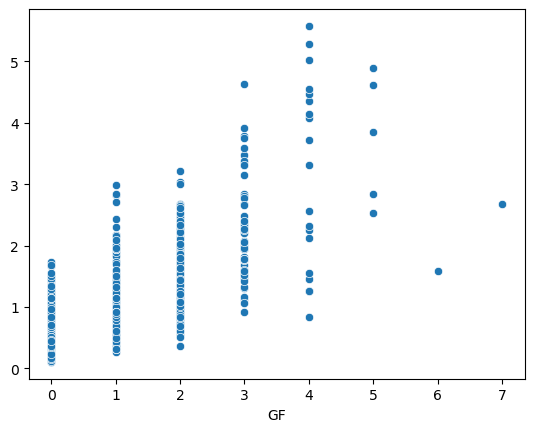

In [139]:
sns.scatterplot(x= observados, y= fitted)

<Axes: >

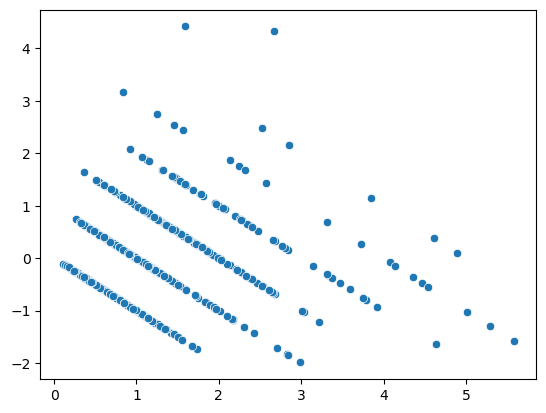

In [140]:
sns.scatterplot(x= fitted, y = residuos)

<Axes: >

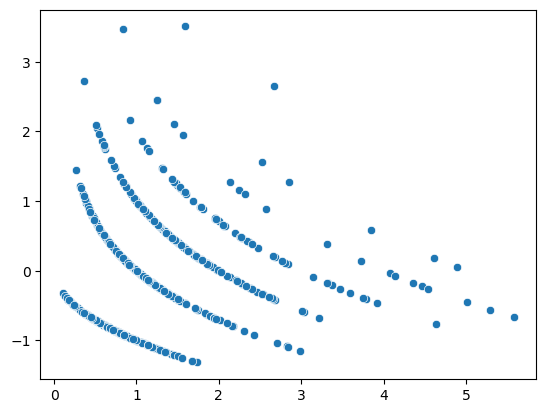

In [141]:
sns.scatterplot(x= fitted, y= residuos_padrao)

In [142]:
infl = modelo.get_influence()
infl.summary_frame().sort_values("cooks_d", ascending= False)

,dfb_Intercept,dfb_C(Equipe)[T.Ath Paranaense],dfb_C(Equipe)[T.Atletico Mineiro],dfb_C(Equipe)[T.Bahia],dfb_C(Equipe)[T.Botafogo (RJ)],dfb_C(Equipe)[T.Bragantino],dfb_C(Equipe)[T.Corinthians],dfb_C(Equipe)[T.Coritiba],dfb_C(Equipe)[T.Cruzeiro],dfb_C(Equipe)[T.Cuiaba],...,dfb_C(Equipe)[T.Internacional]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Palmeiras]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Santos]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Sao Paulo]:C(Venue)[T.1]:xG,dfb_C(Equipe)[T.Vasco da Gama]:C(Venue)[T.1]:xG,dfb_time_diff,cooks_d,standard_resid,hat_diag,dffits_internal
425,-0.033303,-0.018416,-0.026929,2.297805,-0.002790,0.015964,-0.015784,-0.007475,-0.013076,0.035440,...,0.004782,0.062892,-0.032772,-0.006091,0.021140,0.054652,1.536792e+00,-2.917669,0.947514,-12.396745
233,-0.154684,0.013629,-0.001046,0.038906,-0.005692,0.040813,0.012784,0.027719,0.010171,-0.007345,...,0.013424,0.019538,0.025735,0.006600,0.009956,0.206631,1.494510e-01,-1.363602,0.889351,-3.865890
363,0.035725,-0.002219,0.013820,-0.017379,0.002666,0.016111,0.011657,0.027600,-0.003570,0.038020,...,0.003188,-0.022659,0.000645,-0.006690,0.024668,-0.057455,1.304648e-01,-1.744570,0.810844,-3.611991
512,-0.021559,0.000794,-0.009028,-0.002651,-0.002613,0.004635,-0.002511,0.006456,-0.010210,0.004917,...,0.002476,0.002226,1.187896,0.000904,-0.002880,0.031937,9.981504e-02,-1.124966,0.887477,-3.159352
428,-0.193169,0.004868,-0.009595,0.566372,0.010182,0.026791,-0.010079,0.014614,-0.001861,0.050008,...,-0.016809,0.102590,-0.055221,-0.030151,0.019982,0.255884,2.796939e-02,3.827950,0.160282,1.672405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.000216,-0.000122,-0.000096,-0.000141,-0.000117,0.000082,-0.000069,-0.000093,-0.000147,-0.000046,...,-0.000022,-0.000163,-0.000132,-0.000193,-0.000097,-0.000234,2.899318e-07,0.013128,0.143994,0.005385
115,0.000653,-0.000154,-0.000124,-0.000109,-0.000079,-0.000072,-0.000200,-0.000088,0.000027,0.000036,...,-0.000111,0.000099,-0.000294,-0.000141,-0.000100,-0.000791,2.417080e-07,0.008986,0.230379,0.004916
384,0.000525,-0.000080,-0.000113,-0.000134,-0.000017,-0.000094,-0.000078,-0.000259,-0.000076,-0.000141,...,0.000107,-0.000013,-0.000234,0.000060,-0.000038,-0.000611,1.818790e-07,0.009935,0.155601,0.004265
391,0.000170,-0.000104,-0.000356,-0.000085,-0.000098,-0.000041,-0.000172,-0.000165,-0.000033,-0.000084,...,0.000552,-0.000081,-0.000039,-0.000017,-0.000040,-0.000117,1.327539e-07,-0.009640,0.124999,-0.003644


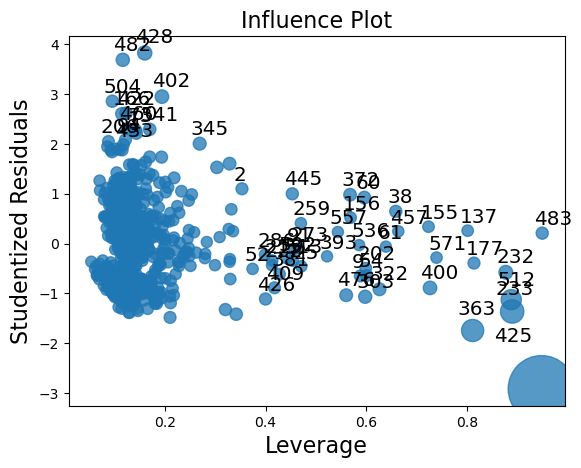

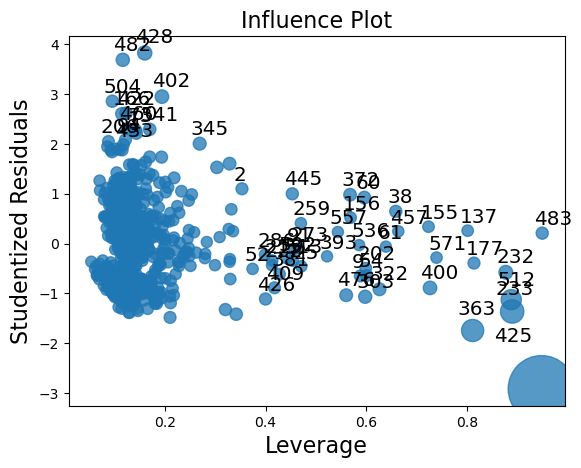

In [143]:
infl.plot_influence()

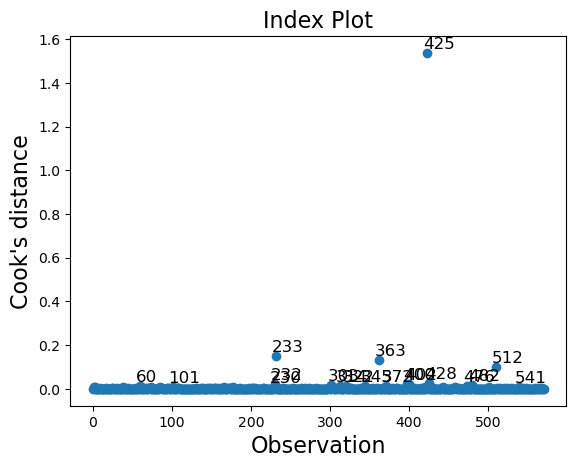

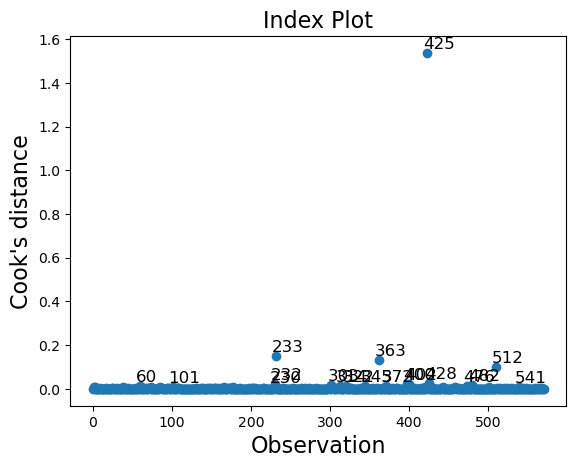

In [144]:
infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())

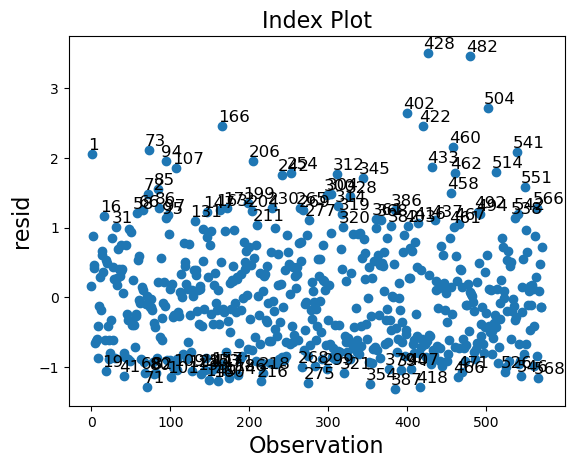

In [145]:
fig = infl.plot_index(y_var="resid", threshold=1)

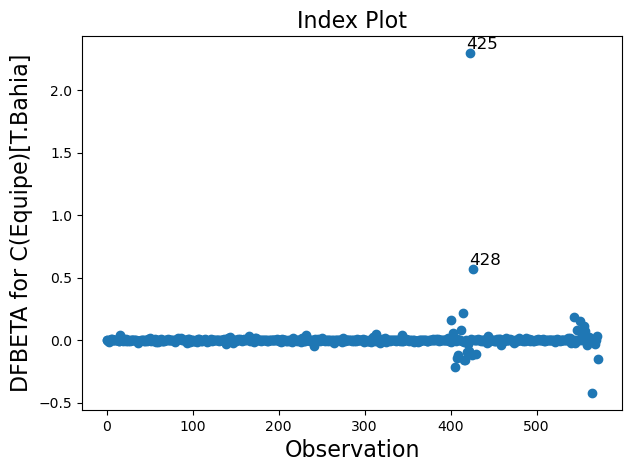

In [146]:
fig = infl.plot_index(y_var="dfbeta", idx=3, threshold=0.5)
fig.tight_layout(pad=1.0)


# Selecão de Modelo

# Seleção de Variaveis

# Previsao

In [147]:
tabela.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'xGConv', 'xGAConv', 'GF/MP',
       'GA/MP', 'expG', 'xG_casa', 'xG_fora', 'xG_total', 'GF_casa', 'GF_fora',
       'GF_total', 'GA_casa', 'GA_fora', 'GA_total', 'xG_sofrido_casa',
       'xG_sofrido_fora', 'Sh_casa', 'SoT_casa', 'Saves_casa', 'GCA_casa',
       'Tklw_casa', 'Sh_fora', 'SoT_fora', 'Saves_fora', 'GCA_fora',
       'Tklw_fora', 'xG_5casa', 'xG_5fora', 'xG_5total', 'GF_5casa',
       'GF_5fora', 'GF_5total', 'GA_5casa', 'GA_5fora', 'GA_5total',
       'xG_5sofrido_casa', 'xG_5sofrido_fora'],
      dtype='object')

In [148]:
def rho_dependencia(x, y, lambda_x, mu_y, rho):
    if x==0 and y==0:
        return 1- (lambda_x * mu_y * rho)
    elif x==0 and y==1:
        return 1 + (lambda_x * rho)
    elif x==1 and y==0:
        return 1 + (mu_y * rho)
    elif x==1 and y==1:
        return 1 - rho
    else:
        return 1.0

def matrix_probs(df, tabela= tabela):
  probs_gols = {}
  lambdas = {}
  matriz_gols = {}
  rho_matriz = {}

  for i in range(0, 10):
    tabela_casa = tabela[tabela['Squad'] == df.iloc[i,3]]
    tabela_fora = tabela[tabela['Squad'] == df.iloc[i,8]]
    lambda_x = modelo.predict(pd.DataFrame(data={'Equipe': df.iloc[i, 3], 
                                                 'Opponent': df.iloc[i, 8],
                                                 'Venue': 1,
                                                 'xG': float(tabela_casa['xG_casa']),
                                                 'time_diff': 1,
                                                 'xGA': tabela_casa['xG_sofrido_casa'],},
                                           index=[1])).values[0]
    lambda_y = modelo.predict(pd.DataFrame(data={'Equipe': df.iloc[i, 8], 
                                                 'Opponent': df.iloc[i, 3],
                                                 'Venue': 0,
                                                 'xG': float(tabela_fora['xG_fora']),
                                                 'time_diff': 1,
                                                 'xGA': tabela_fora['xG_sofrido_fora']},
                                           index=[1])).values[0]
    
    lambdas[df.iloc[i, 3]] = [lambda_x, lambda_y]
    probs_gols[df.iloc[i, 3]] = [[stats.poisson.pmf(i, lambdas) for i in range(0, 8)] for lambdas in [lambda_x, lambda_y]]
    matriz_gols[df.iloc[i, 3]] = np.outer(probs_gols[df.iloc[i, 3]][0], probs_gols[df.iloc[i, 3]][1])
    rho_matriz[df.iloc[i, 3]] = np.array([[rho_dependencia(gol_casa, gol_fora, lambda_x, lambda_y, (-0.13)) for gol_fora in range(2)] for gol_casa in range(2)])
    matriz_gols[df.iloc[i, 3]][:2,:2] = matriz_gols[df.iloc[i, 3]][:2,:2] * rho_matriz[df.iloc[i, 3]]

  return matriz_gols, probs_gols, lambdas#, rho_matriz


def inserir_df(matriz, df, probs_gols, lambdas):
  times = list(matriz.keys())
  gols2 = pd.DataFrame()

  for time in times:
    df.loc[df['Home'] == time, 'vitoria_casa'] = np.sum(np.tril(matriz[time], -1))
    df.loc[df['Home'] == time, 'empate'] = np.sum(np.diag(matriz[time]))
    df.loc[df['Home'] == time, 'vitoria_fora'] = np.sum(np.triu(matriz[time], 1))
    
    lambdas1 = pd.DataFrame(lambdas[time]).T
    gols = pd.concat([lambdas1, pd.DataFrame(probs_gols[time][0]).T, pd.DataFrame(probs_gols[time][1]).T], axis= 1)
    gols['Home'] = time
    gols2 = pd.concat([gols2, gols])

  gols2.columns = ['lambda_x', 'lambda_y',
                  '0x', '1x', '2x', '3x', '4x', '5x', '6x', '7x',
                  '0y', '1y', '2y', '3y', '4y', '5y', '6y', '7y',
                  'Home']
  df = pd.merge(df, gols2, on= 'Home')
  return df

In [149]:
matriz_gols, prob_gols, lambdas = matrix_probs(rodada_futura)
rodada_futura = inserir_df(matriz_gols, rodada_futura, prob_gols, lambdas)

In [150]:
rodada_futura

,Wk,Day,Date,Home,xGCasa,gols_casa,gols_fora,xGFora,Away,vitoria_casa,...,6x,7x,0y,1y,2y,3y,4y,5y,6y,7y
0,30,Sat,2023-10-28,Flamengo,NaN,NaN,NaN,NaN,Bragantino,0.339599,...,0.000561,0.000082,0.377473,0.367755,0.179144,0.058177,0.014170,0.002761,0.000448,6.239720e-05
1,30,Sat,2023-10-28,Fortaleza,NaN,NaN,NaN,NaN,Cruzeiro,0.334635,...,0.000606,0.000090,0.360749,0.367810,0.187504,0.063725,0.016243,0.003312,0.000563,8.197835e-05
2,30,Sat,2023-10-28,America (MG),NaN,NaN,NaN,NaN,Gremio,0.234780,...,0.001084,0.000180,0.168453,0.300031,0.267193,0.158632,0.070635,0.025162,0.007469,1.900495e-03
3,30,Sat,2023-10-28,Palmeiras,NaN,NaN,NaN,NaN,Bahia,0.647512,...,0.007190,0.001813,0.558291,0.325414,0.094838,0.018426,0.002685,0.000313,0.000030,2.531980e-06
4,30,Sun,2023-10-29,Ath Paranaense,NaN,NaN,NaN,NaN,Sao Paulo,0.749060,...,0.019777,0.006426,0.565587,0.322323,0.091845,0.017447,0.002486,0.000283,0.000027,2.190855e-06
5,30,Sun,2023-10-29,Goias,NaN,NaN,NaN,NaN,Vasco da Gama,0.416584,...,0.001964,0.000371,0.358407,0.367756,0.188675,0.064532,0.016554,0.003397,0.000581,8.515912e-05
6,30,Sun,2023-10-29,Corinthians,NaN,NaN,NaN,NaN,Santos,0.732558,...,0.012821,0.003722,0.623174,0.294717,0.069690,0.010986,0.001299,0.000123,0.000010,6.542627e-07
7,30,Sun,2023-10-29,Internacional,NaN,NaN,NaN,NaN,Coritiba,0.515752,...,0.009064,0.002415,0.302015,0.361596,0.216466,0.086390,0.025858,0.006192,0.001236,2.113330e-04
8,30,Sun,2023-10-29,Botafogo (RJ),NaN,NaN,NaN,NaN,Cuiaba,0.714175,...,0.010113,0.002768,0.631539,0.290252,0.066699,0.010218,0.001174,0.000108,0.000008,5.427464e-07
9,30,Sat,2023-10-28,Atletico Mineiro,NaN,NaN,NaN,NaN,Fluminense,0.478998,...,0.001253,0.000215,0.524505,0.338463,0.109205,0.023490,0.003790,0.000489,0.000053,4.849026e-06


# Adicionar em 'Todas Previsoes'

In [82]:
todas_previsoes = pd.read_excel('dados/previsoes/todas_previsoes.xlsx', index_col= None)
todas_previsoes.drop(todas_previsoes.columns[0], axis=1, inplace= True)

FileNotFoundError: [Errno 2] No such file or directory: 'dados/previsoes/todas_previsoes.xlsx'

In [ ]:
def compare_columns(row):
    if row['gols_casa'] > row['gols_fora']:
        return 'gols_casa'
    elif row['gols_casa'] < row['gols_fora']:
        return 'gols_fora'
    else:
        return 'empate'  # Handle cases when values are equal

def compare_columns1(row):
    if row['vitoria_casa'] > row['empate'] and row['vitoria_casa'] > row['vitoria_fora']:
        return 'gols_casa'
    elif row['vitoria_fora'] > row['empate'] and row['vitoria_fora'] > row['vitoria_casa']:
        return 'gols_fora'
    else:
        return 'empate'  # Handle cases when values are equal

def compare_columns2(row):
    if row['acerto1'] == row['acerto2']:
        return 'acerto'
    else:
        return 'fracasso'

In [ ]:
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['vitoria_casa'] == None).all():
  todas_previsoes = pd.concat([todas_previsoes, rodada_futura], ignore_index= True)

if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['gols_casa'].isna()).all():
  resultados = todas_rodadas[todas_rodadas['Wk'] >= todas_previsoes['Wk'].min()].reset_index().drop('index', axis= 1)
  todas_previsoes.update(resultados)
  
if (todas_previsoes[todas_previsoes['Wk'] == rodada_prox]['gols_casa'].notna()).all():  
  todas_previsoes['acerto1'] = todas_previsoes.apply(compare_columns, axis=1)
  todas_previsoes['acerto2'] = todas_previsoes.apply(compare_columns1, axis=1)
  todas_previsoes['acerto'] = todas_previsoes.apply(compare_columns2, axis=1)
  todas_previsoes.drop(['acerto1', 'acerto2'], axis=1, inplace= True)

In [151]:
#todas_previsoes.to_excel('todas_previsoes.xlsx')
rodada_futura.to_excel(f'previsao_rodada-{rodada_prox}.xlsx')